Imports

In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


Read data

In [454]:
bank = pd.read_csv('data/Bank Customer Churn Prediction.csv')

In [455]:
bank.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Checking for NaN Values

In [456]:
bank.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Dropping customer id column

In [457]:
bank = bank.drop('customer_id', axis = 1)
bank.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Churn data

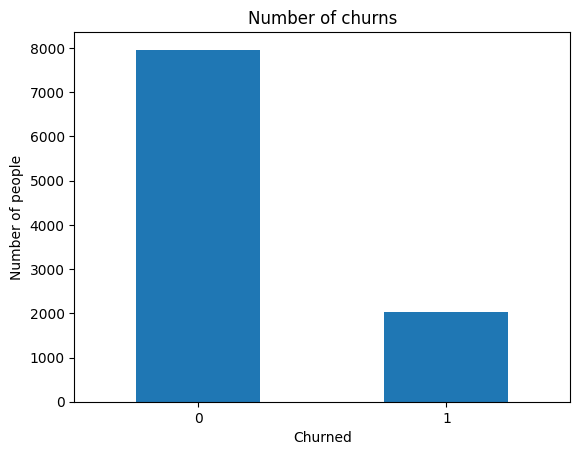

In [458]:
bank['churn'].value_counts().plot(kind = 'bar')
plt.title('Number of churns')
plt.xlabel('Churned')
plt.ylabel('Number of people')
plt.xticks(rotation = 0)
plt.show()

Plotting the countries of bankers

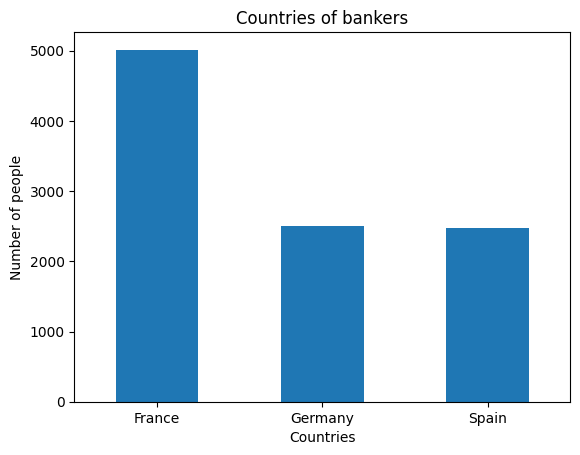

In [459]:
bank['country'].value_counts().plot(kind = 'bar')
plt.title('Countries of bankers')
plt.xlabel('Countries')
plt.ylabel('Number of people')
plt.xticks(rotation = 0)
plt.show()

Changing countries to integer values

In [460]:
bank['country'] = bank['country'].replace(['France'], 0)
bank['country'] = bank['country'].replace(['Germany'], 1)
bank['country'] = bank['country'].replace(['Spain'], 2)
bank.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,850,2,Female,43,2,125510.82,1,1,1,79084.10,0


Plotting Gender

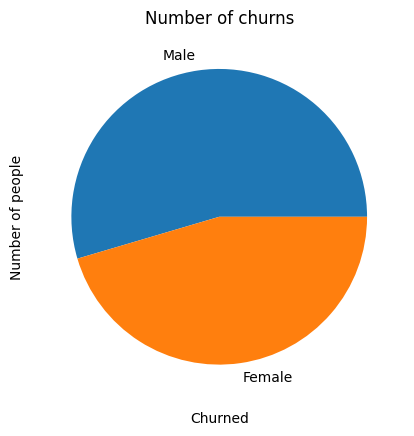

In [461]:
bank['gender'].value_counts().plot(kind = 'pie')
plt.title('Number of churns')
plt.xlabel('Churned')
plt.ylabel('Number of people')
plt.xticks(rotation = 0)
plt.show()

Changing gender values to integers

In [462]:
bank['gender'] = bank['gender'].replace(['Female'], 0)
bank['gender'] = bank['gender'].replace(['Male'], 1)
bank.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


changing gender and country to numeric integer values

In [463]:
bank['gender'] = pd.to_numeric(bank['gender'])
bank['country'] = pd.to_numeric(bank['country'])

Checking correlation values

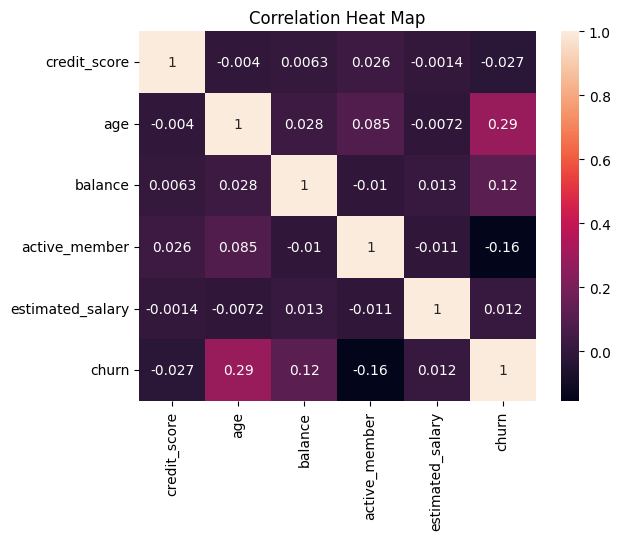

In [464]:
bank_col = bank[['credit_score','age', 'balance','active_member', 'estimated_salary', 'churn']]
sns.heatmap(bank_col.corr(), fmt = '.2g', annot = True)
plt.title('Correlation Heat Map')
plt.show()

Creating train test variables

In [465]:
X = bank.drop('churn', axis = 1)
y = bank['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Creating scaler model and knn model

In [466]:
scaler = StandardScaler()

knn = KNeighborsClassifier(n_neighbors = 10)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Fitting Data and predictions

In [467]:
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

print('Accuracy:', accuracy_score(y_test,predictions))

print(classification_report(y_test, predictions))

Accuracy: 0.847
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1607
           1       0.77      0.32      0.45       393

    accuracy                           0.85      2000
   macro avg       0.81      0.65      0.68      2000
weighted avg       0.84      0.85      0.82      2000



Confusion matrix

In [468]:
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)

[[1570   37]
 [ 269  124]]


Calculating Precion / Specificity and Recall / Sensitivity

In [469]:
TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[1,0]
FN = conf_matrix[0,1]

precision = TP / (TP + FP)
print('Precision:' , precision)

recall = TP / (TP + FN)
print('Recall:', recall)


Precision: 0.8537248504622077
Recall: 0.9769757311761046
